In [1]:
import pandas as pd

# 读取数据
data = pd.read_csv("data/dataset.csv")
data

,O,N,SSA,PV,RMIC,Dap,ID/IG,M,Anion,AML,PW,CD,Cs
0,7.15,3.52,1546.1,0.5753,93.985747,1.488390,1.029,2,1,1.0,1.6,0.10,85.0
1,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.10,90.2
2,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.25,86.3
3,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.50,79.9
4,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,1.00,70.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,1.00,90.1
596,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,2.00,84.7
597,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,5.00,75.5
598,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,8.00,69.4


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data['target_class'] = pd.qcut(data['Cs'], q=10, labels=False)
X = data.drop(['Cs', 'target_class'], axis=1)
y = data['Cs']
stratify_column = data['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# 线性回归 Linear Regression

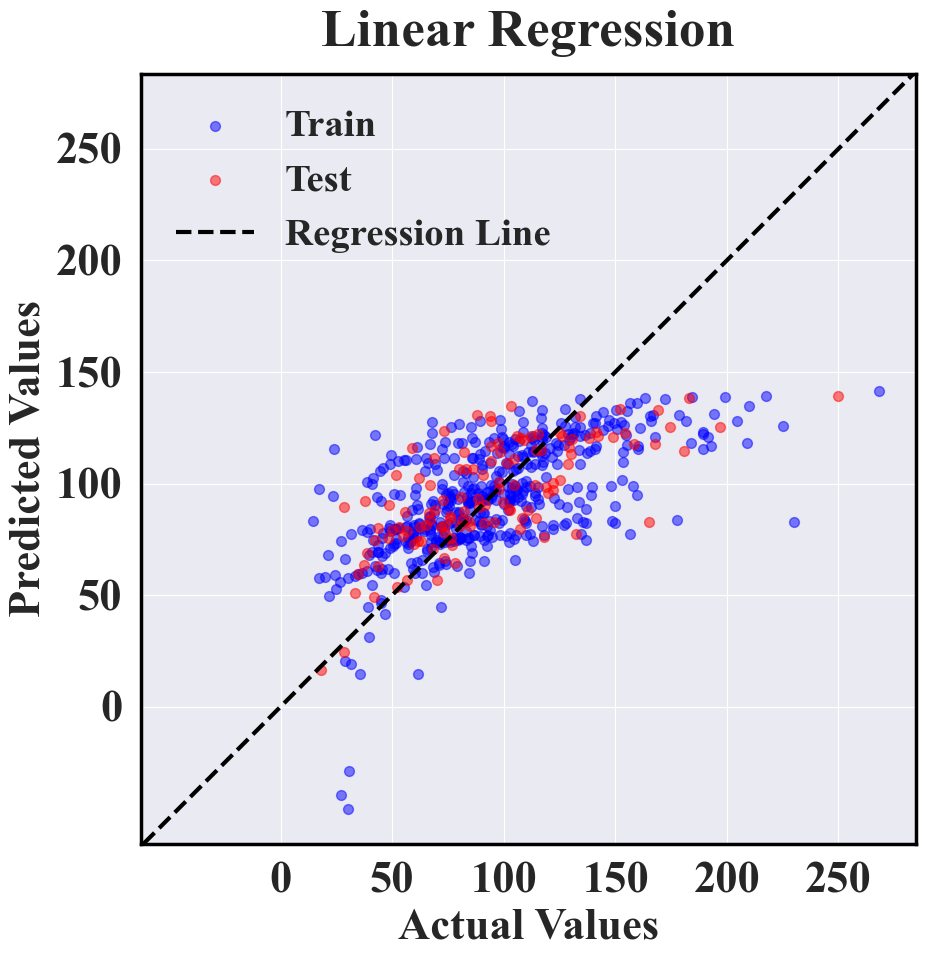

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Linear Regression,0.39119,23.192948,33.520184,31.148635,0.476773,21.80851,27.6218,28.706683


In [3]:
from function import metrics_to_dataframe, plot_actual_vs_predicted
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

lr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression','output/figures/lr.png')

lr_metrics

# 支持向量回归Support Vector Regression

[LibSVM]

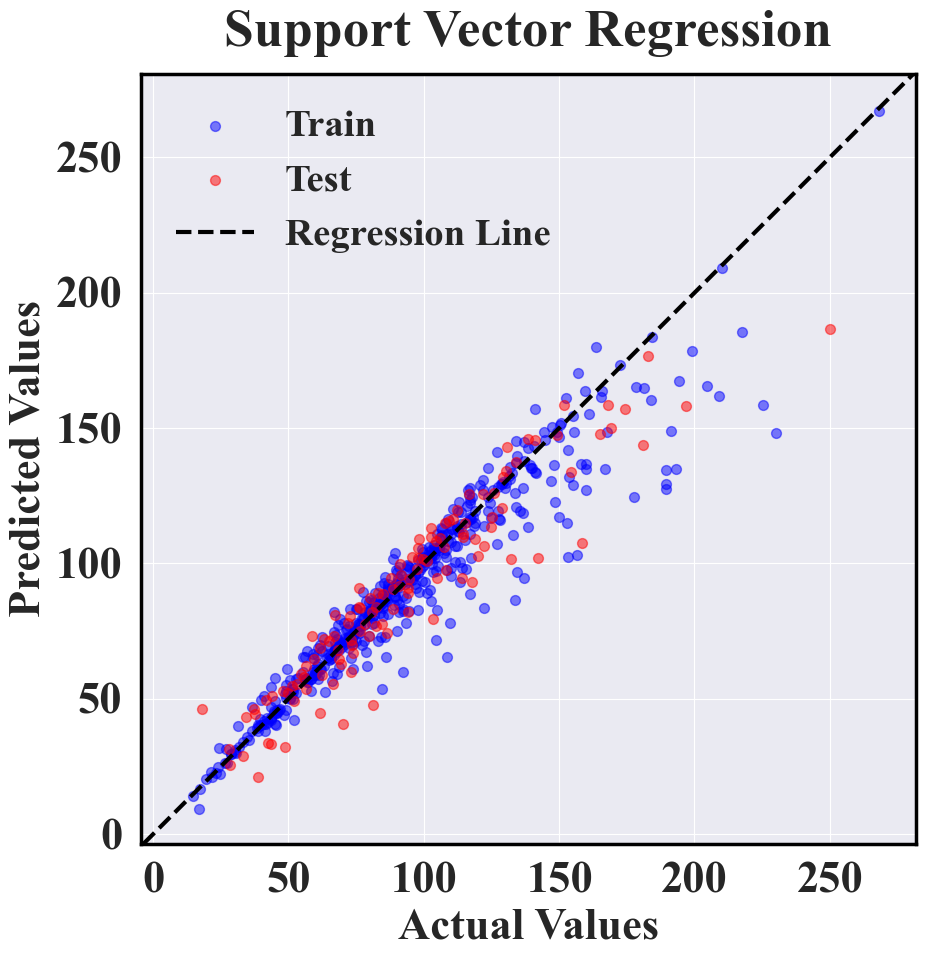

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,SVR,0.892775,7.116614,6.89433,13.072148,0.873871,9.668162,11.693801,14.094382


In [4]:
from sklearn.svm import SVR

svr = SVR(
    C=5, 
    kernel='poly', 
    degree=5, 
    gamma='scale', 
    coef0=5, 
    epsilon=0.75, 
    verbose=True
)

svr.fit(X_train_scaled, y_train)

y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

svr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'SVR')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Support Vector Regression', 'output/figures/svr.png')

svr_metrics

# 随机森林回归Random Forest Regression

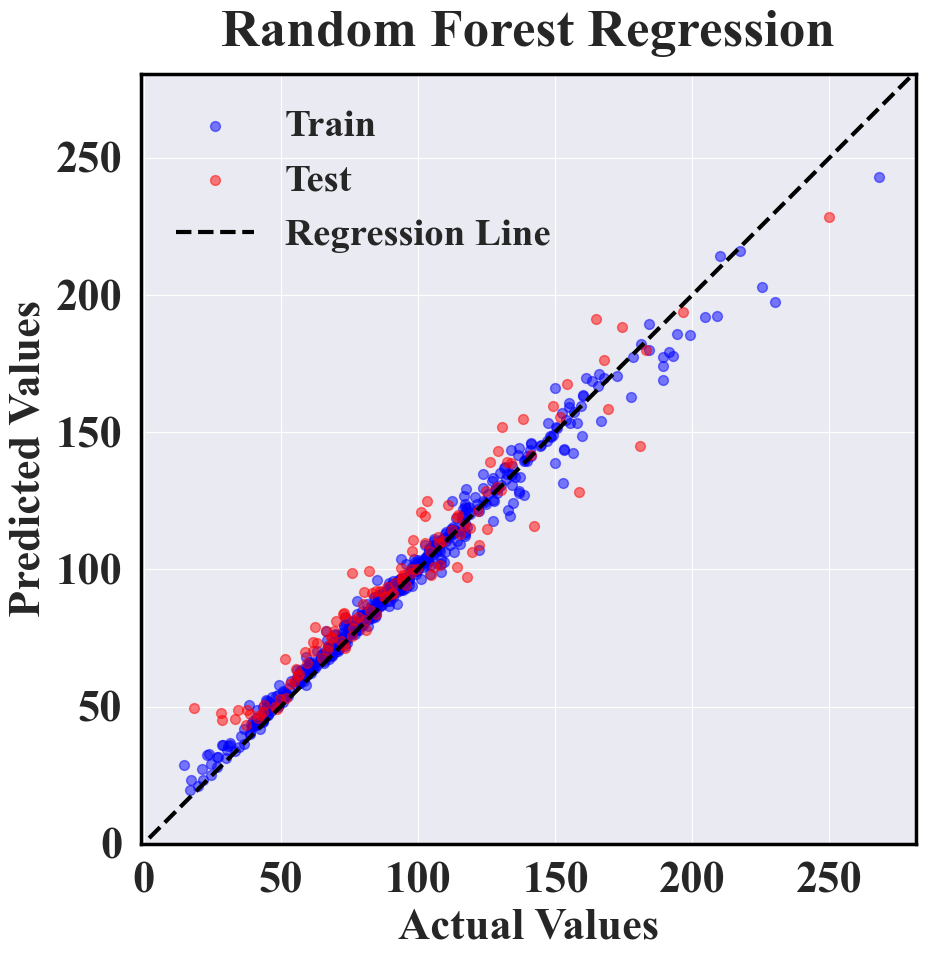

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Randon Forest,0.982551,3.616478,4.691865,5.273244,0.923898,8.188058,11.335461,10.948036


In [5]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=15,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            max_features=1,
                            random_state=21)
rfr.fit(X_train_scaled, y_train)

y_train_pred = rfr.predict(X_train_scaled)
y_test_pred = rfr.predict(X_test_scaled)

rfr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Randon Forest')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Random Forest Regression','output/figures/rfr.png')

rfr_metrics

# XGBoost回归 XGBoost Regression

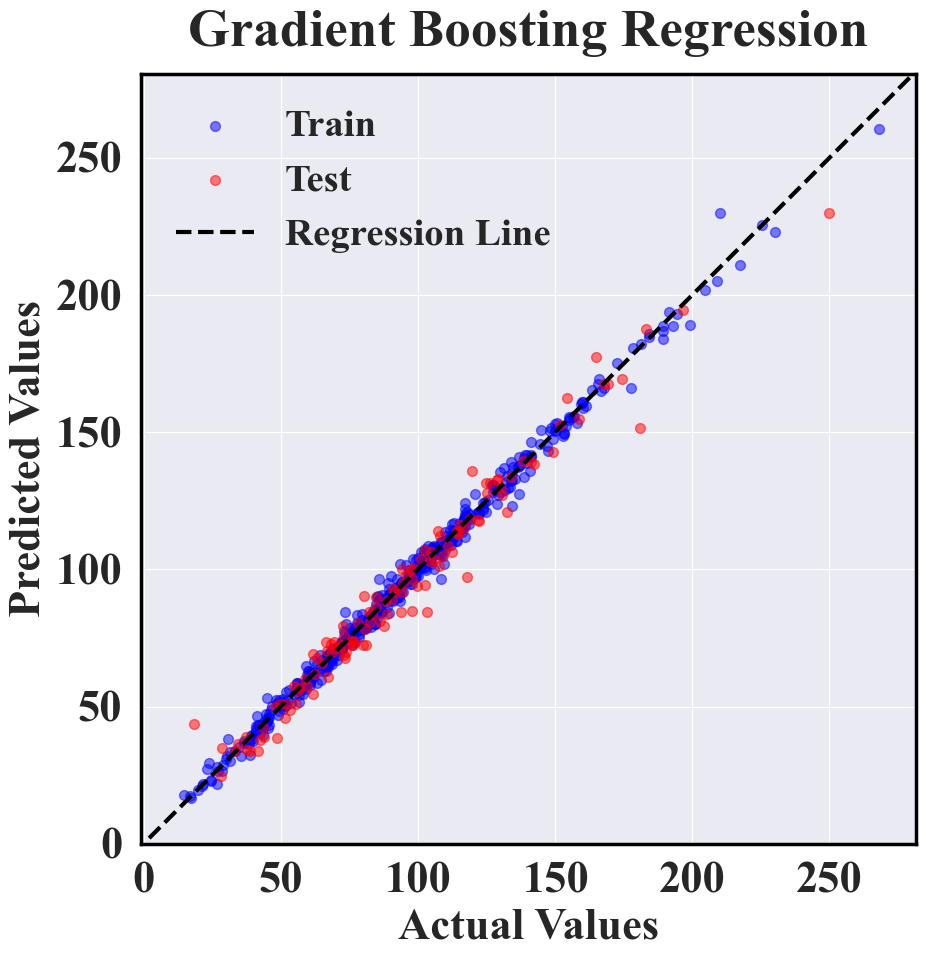

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,GBR,0.994305,2.144943,2.667304,3.012577,0.971091,4.656269,6.376624,6.747661


In [6]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100,
                                alpha=0.001,
                                learning_rate=0.18,
                                max_depth=8,
                                max_features=0.2,
                                min_samples_leaf=4,
                                min_samples_split=2,
                                subsample=0.7,
                                random_state=21)
gbr.fit(X_train_scaled, y_train)

y_train_pred = gbr.predict(X_train_scaled)
y_test_pred = gbr.predict(X_test_scaled)

gbr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'GBR')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Gradient Boosting Regression','output/figures/gbr.png')

gbr_metrics

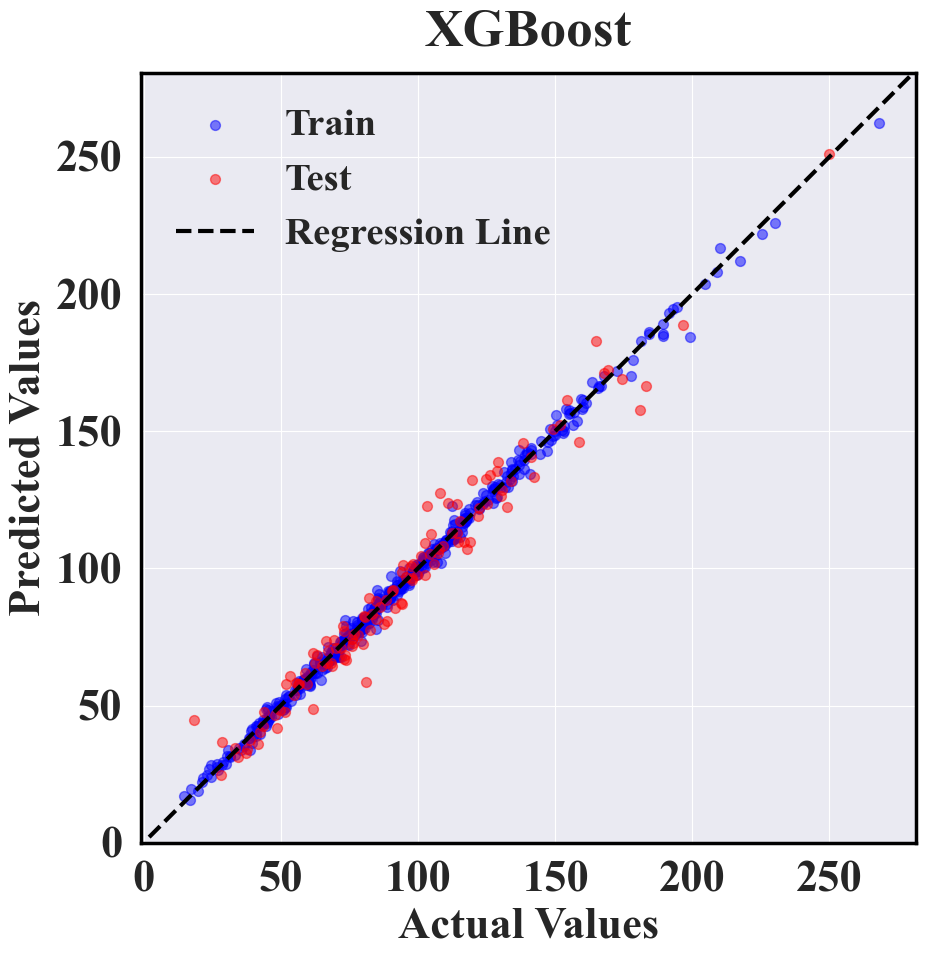

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,XGBoost,0.996692,1.666523,2.100395,2.296165,0.966799,5.232248,7.021553,7.231244


In [7]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100,
                   learning_rate=0.16,
                   subsample=0.5,
                   gamma=0.1,
                   max_depth=8,
                   min_child_weight=2,
                   reg_alpha=0.35,
                   colsample_bytree=0.7,
                   colsample_bylevel=1.0,
                   colsample_bynode=0.7,
                   random_state=21)
xgb.fit(X_train_scaled, y_train)

y_train_pred = xgb.predict(X_train_scaled)
y_test_pred = xgb.predict(X_test_scaled)

xgb_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost','output/figures/XGB.png')

xgb_metrics

Epoch 1/2000


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 25, but received input with shape (32, 12)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 12), dtype=float32)
  • training=True
  • mask=None